# 1. CNN 기초
 
### 구성

Convolutional Layer - ReLU - Convolutional Layer - ReLU - Pooling.. 을 쭉 반복하다가 마지막에 Fully Connected Neural Network를 구성해서 마지막에 Labelling을 해주는 형식으로 구성됨 

### 이미지 형태

예를 들어, 32(가로) x 32(가로) x 3(RGB 3가지 값)의 이미지가 있다고 가정할 수 있다. (일종의 벡터라고 생각하면 편안함)

### 필터 사이즈 계산

32 x 32 x 3 의 이미지가 있다고 할 때, Filter를 설정할 수 있음. 예를 들어, 5 x 5 x 3의 형태로 Filter를 만들어낼 수 있다. 필터의 역할은 특정 구역의 이미지를 뽑아내어 하나의 값(One Number)로 만들어내는 기능을 수행한다.

ReLU(Wx+b)의 형태를 이용해서 하나의 값으로 만들어낸다. 즉, w1 * x1 + w2 * x2 + ... + w5 * x5 를 계산해서 나온 하나의 값을, ReLU 함수에 호출해서 넣어주는 개념으로 생각하면 된다.

이 때 사용한 필터를 옆으로, 혹은 밑으로 "stride 만큼" 필터를 넘겨주면서 전체 이미지를 쭉 훑어가면서 각 영역들에서 상수값을 만들낸다. 전체 총 나오는 필터의 결과값의 갯수 만큼 값이 나오는데, 한 변이 N, 필터의 한 변 크기가 F일 때, 한 변에서 {(N - F) / stride} + 1 의 식 만큼 필터를 통과한 결과값이 나오게 된다.

즉, 각 변에서 {(N-F)/stride + 1} 만큼 몇개가 나오는지 계산하면, 필터의 사이즈를 계산할 수 있다.

### Padding

**실제로 사용할 때**는, 이미지의 가장자리에는 Padding(모서리) 부분에 0값을 넣어준다. 이는,

1) 이미지가 급격하게 작아지는 문제를 예방하고

2) 주위에 필요없는 이미지 요소들을 없앨 수 있다

Padding을 준다는 것은 이미지에 Padding의 크기만큼의 픽셀을더 붙여준다고 생각하면 된다.

Padding을 1만큼 주고 필터를 생성하면, 처음에 넣은 이미지와 동일한 사이즈의 Filter를 거친 Convolution 결과 이미지가 생성된다


### 필터를 여러개 동시에 적용시키면?

32 x 32 x 3 이미지에서 (5 x 5 x 3) 짜리로 6개 다른 필터를 만들면, (28 x 28 x 6) 의 Convolutional Layer의 계층이 만들어진다.

(28 x 28 x 6) 에서 앞의 28 x 28은 필터 사이즈를 의미하고, 마지막 6은 몇 번 반복했는지, 즉 몇 개의 필터가 반복되었는지를 의미한다.

그 다음에 또 한번 적용시키는 Convolutional Layer의 갯수는 6개와 동일해야 한다.


### Weight의 개수는 어떻게 정해지는가? 

처음에는 5 x 5 x 3 x 6개 처럼, 필터의 width, height, rgb 값, 새롭게 만든 필터의 갯수를 모두 곱해서 계산할 수 있다


### Pooling이란?

필터를 사용할 때 여러 개의 필터를 사용한다. 이 때, 필터 하나를 뽑아서 Sampling을 하고, 다른 필터들에게서도 똑같이 적용해서 필요한 부분만 뽑아내는 것을 Pooling이라고 한다. 전체의 값들 중에서 특정한 조건을 가진 것만을 뽑아내기 때문에 Sampling이라는 개념으로 볼 수 있음.

* Max Pooling : 가장 큰 값을 뽑아내는 것


### Fully Connected Layer란?

마지막에 softmax function 등 실질적인 구분에 필요한 function을 쓰는 단계의 층을 의미한다.

Convolution, Subsampling을 계속 반복하는 과정에서 Feature Extraction을 하다가, 마지막에 Fully Connected Layer에서 의사결정을 내린다고 볼 수 있다.


### Convolution이란?

값을 움직여나가면서 계속 더해나간다

# 2. CNN 구성요소의 기능

#### 필터는 어떤 기능을 하는가?

필터는 입력받은 데이터에서 그 "특성을 가지고 있으면 큰 결과값을 내고", 특성을 가지고 있지 않으면 결과값이 0에 가까운 값이 나오게 되면서 데이터가 그 특성을 가지고 있는지 없는지 여부를 알게 해준다.

즉, 필터는 특정 Feature가 있으면 그것에 대해 더 큰 값을 주는 역할을 한다.


#### Activation Function(ReLU)는 어떤 기능을 하는가?

필터를 통해서 Feature Map이 만들어진 다음에 참/거짓으로 구분하는 것이 아니라, 참에 가까워지면 더 큰 값을 내는 식으로 표현해주기 위함이다.


#### Padding은 어떤 기능을 하는가?

계속해서 필터를 적용시키면 원본 이미지가 줄어드므로, 사이즈를 유지시켜주는 역할을 한다. 왜 사이즈를 유지시켜야 하는가?

유실된 데이터가 중요하지 않은 데이터면 상관없지만, 중요한 데이터 일수도 있으므로 특징이 유실되기 전에 유지시켜주는 의미가 크다.

더 나아가, Overfitting도 방지하는데, 그 이유는 원본 데이터에 0값을 넣어서 원래의 특징을 희석시켜버리고 이것을 기반으로 머신러닝 모델이 트레이닝 값에만 정확하게 맞아들어가는 현상도 방지해주는 것이다.


#### Pooling을 어떤 기능을 하는가?

Convolution 계층을 통해서 어느정도 특징이 추출되었으면, 이 모든 특징들을 쓸 필요가 없다. 필터에서 가장 큰 값이 의미있는 Feature라고 지정했으므로, Max_Pooling을 자주 써서 가장 큰 값(큰 특징)만을 뽑아준다고 생각하면 편안하다. 굳이 고해상도 사진이 있어야만 사물을 판단할 수 있는 것이 아니라, 작은 크기의 사진만으로도 판단할 수 있는 원리이다.

풀링은 매번 사용하는 것이 아니라 데이터의 크기를 줄이고 싶을 때 선택적으로 사용하는 것이다.

풀링을 잘 쓰면, 전체 데이터의 사이즈를 잘 줄여서 연산에 들어가는 리소스가 줄어들고, 데이터의 크기를 줄이면서 소실이 발생하기 때문에 오버피팅을 방지할 수도 있다.


#### DropOut은 어떤 기능을 하는가?

Fully Conncected Layer와 Softmax 함수 중간에 DropOut Layer를 넣어주는데, 신경망이 학습중일 때 랜덤하게 뉴런을 꺼서 학습을 방해하여 트레이닝 데이터에 학습이 치우치는 현상을 막아주는 것을 의미한다.


# 3. CNN 예시

(1, 3, 3, 1)


AttributeError: 'AxesImage' object has no attribute 'show'

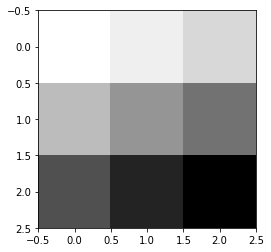

In [27]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

#Image 생성
sess = tf.InteractiveSession()
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]], 
                   [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)
plt.imshow(image.reshape(3,3), cmap='Greys').show()

In [26]:
'''
Image : (1,3,3,1) 
Filter : (2,2,1,1) # 2x2 크기의 필터, 1개의 색깔 개수, 1개의 필터 개수
Stride : (1x1)
Padding : VALID

Convolution을 한다는 것은, 첫 번째 필터적용 대상인

[[[1],[2]],                  [[[1],[1]],
 [[4],[5]]] 에 대해서    필터 [[1],[1]]] 를 적용하면 1x1 + 2x1 + 4x1 + 5x1 로 같은 위치에 있는 값을 곱해준다 (합성곱, 즉 Convolution)
'''

'\nImage : (1,3,3,1) \nFilter : (2,2,1,1) # 2x2 크기의 필터, 1개의 색깔 개수, 1개의 필터 개수\nStride : (1x1)\nPadding : VALID\n\nConvolution을 한다는 것은, 첫 번째 필터적용 대상인\n\n[[[1],[2]],                  [[[1],[1]],\n [[4],[5]]] 에 대해서    필터 [[1],[1]]] 를 적용하면 1x1 + 2x1 + 4x1 + 5x1 로 같은 위치에 있는 값을 곱해준다 (합성곱, 즉 Convolution)\n'

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


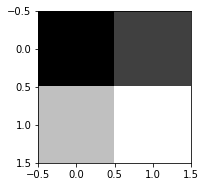

In [43]:
#Convolution 계산 (일반)

#Image 크기
print("image.shape", image.shape) #(1,3,3,1)

#Filter 크기는 conv2d에서 연산하는 사이즈와 맞아야 함
weight = tf.constant([[[[1.]],[[1.]]],
                       [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)

#conv2d : Convolution 연산
conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='VALID') #padding='SAME' 으로 넣어주면 알아서 같은 사이즈가 되도록 padding을 채워줌
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)

#시각화 하기 위한 처리과정
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2,2))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(2,2), cmap='gray')

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


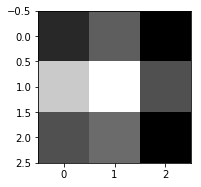

In [44]:
# Padding을 알아서 넣은 형태의 Convolution (padding='SAME')

print("image.shape", image.shape)

weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 3)
conv2d_img.shape (1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


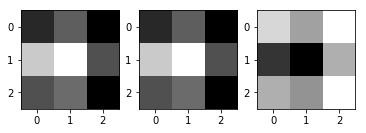

In [45]:
# 필터 3개짜리로 구현

print("image.shape", image.shape)

#필터 자체의 갯수를 늘려줌
weight = tf.constant([[[[1.,10.,-1.]],[[1.,10.,-1.]]],
                      [[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

In [49]:
# Pooling


image = np.array([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],
                    strides=[1, 1, 1, 1], padding='SAME') #kernel size는 2,2의 중간값으로 이용, strides는 1,1씩 이동
print(pool.shape) #max_pooling을 하는 크기
print(pool.eval())

(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]



# 3. MNIST 데이터 이용

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


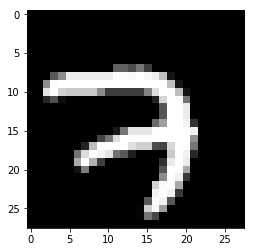

In [50]:
#Image 불러오기
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

img = mnist.train.images[0].reshape(28,28) #28x28으로 reshape
plt.imshow(img, cmap='gray')

Tensor("Conv2D_9:0", shape=(1, 14, 14, 5), dtype=float32)


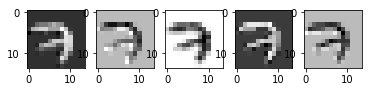

In [51]:
#Convolution Layer 통과시키기

sess = tf.InteractiveSession()

img = img.reshape(-1,28,28,1) # -1은 알아서 계산하라는 reshape의 방법, 28x28으로 사이즈 규정, 색깔은 1가지 
W1 = tf.Variable(tf.random_normal([3, 3, 1, 5], stddev=0.01)) #3x3짜리 필터, 색깔은 1가지, 필터 개수는 5개
conv2d = tf.nn.conv2d(img, W1, strides=[1, 2, 2, 1], padding='SAME') #stride는 2x2로 움직이고, padding을 줘서 동일한 결과를 내겠다는 뜻
print(conv2d)
sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap='gray')

Tensor("MaxPool_4:0", shape=(1, 7, 7, 5), dtype=float32)


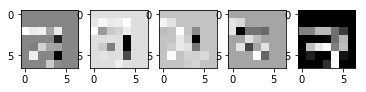

In [52]:
#Max Pooling
pool = tf.nn.max_pool(conv2d, ksize=[1, 2, 2, 1], strides=[
                        1, 2, 2, 1], padding='SAME') #Convolution결과인 conv2d, Pooling하는 커널사이즈는 2x2(중간값), stride는 2x2 
print(pool)
sess.run(tf.global_variables_initializer())
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(7, 7), cmap='gray')

# 5. CNN으로 MNIST 문제 해결하기

![img](img/cnn.png)

In [77]:
import tensorflow as tf
import random

#첫 번째 Convolution Layer

# 초기 들어가는 데이터는 28 x 28
X = tf.placeholder(tf.float32, [None, 784]) #784 = 28 x 28 개의 픽셀을 갖는 X (인풋값)
X_img = tf.reshape(X, [-1, 28, 28, 1]) # -1로 알아서 맞춰보고, 28x28 사이즈, 색깔은 1가지 로 reshape 
Y = tf.placeholder(tf.float32, [None, 10]) # 마지막에 Fully Connected Layer를 이용해서 10개로 분류할거야

# 들어가는 이미지의 형태 (?, 28, 28, 1)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01)) #필터 사이즈는 3x3, 색은 1가지, 필터 개수는 32개

L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME') #STRIDE는 1로 해서 32개의 필터를 모두 Convolution을 통과시킴
L1 = tf.nn.relu(L1) # ReLU 통과
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME') #Max_Pooling, 커널 사이즈는 2x2, stride는 2x2로 이동

#    Conv     -> (?, 28, 28, 32)
#    Pool     -> (?, 14, 14, 32)

In [78]:
#두 번째 Convolution Layer

W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01)) #필터 사이즈는 3x3, 이전 필터의 개수와 같은 32개, 이번에는 64개 필터 생성

L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')

#    Conv      ->(?, 14, 14, 64)
#    Pool      ->(?, 7, 7, 64)

In [79]:
#세 번째 Convolution Layer

W3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01))
L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME')
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[
                    1, 2, 2, 1], padding='SAME')

# Fully Connected Layer에 넣기 전에, 입체적으로 들어가있는 값을 일직선(1차원)으로 쭉 펼쳐주어야 함
L3_flat = tf.reshape(L3, [-1, 128 * 4 * 4])

#    Conv      ->(?, 7, 7, 128)
#    Pool      ->(?, 4, 4, 128)
#    Reshape   ->(?, 4 * 4 * 128) # Flatten them for FC

In [ ]:
#FC를 처음으로 만들어줌

W4 = tf.get_variable("W4", shape=[128 * 4 * 4, 625],initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([625]))
L4 = tf.nn.relu(tf.matmul(L3_flat, W4) + b4)

In [69]:
#마지막으로 펼쳐서 만드는 Fully Connected Layer

W5 = tf.get_variable("W5", shape=[625, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L4, W5) + b5

In [ ]:
# Training 실시

print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy

# if you have a OOM error, please refer to lab-11-X-mnist_deep_cnn_low_memory.py

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(logits, 1), feed_dict={X: mnist.test.images[r:r + 1], keep_prob: 1}))